Information Gain for Age: 0.24674981977443933
Information Gain for Income: 0.02922256565895487
Information Gain for Student: 0.15183550136234159
Information Gain for Credit_Rating: 0.10224356360985076
The first feature to select for constructing the decision tree is: Age
The highest information gain is: 0.24674981977443933
Training Set Accuracy: 1.0
Test Set Accuracy: 1.0
The depth of the constructed Decision Tree is: 4


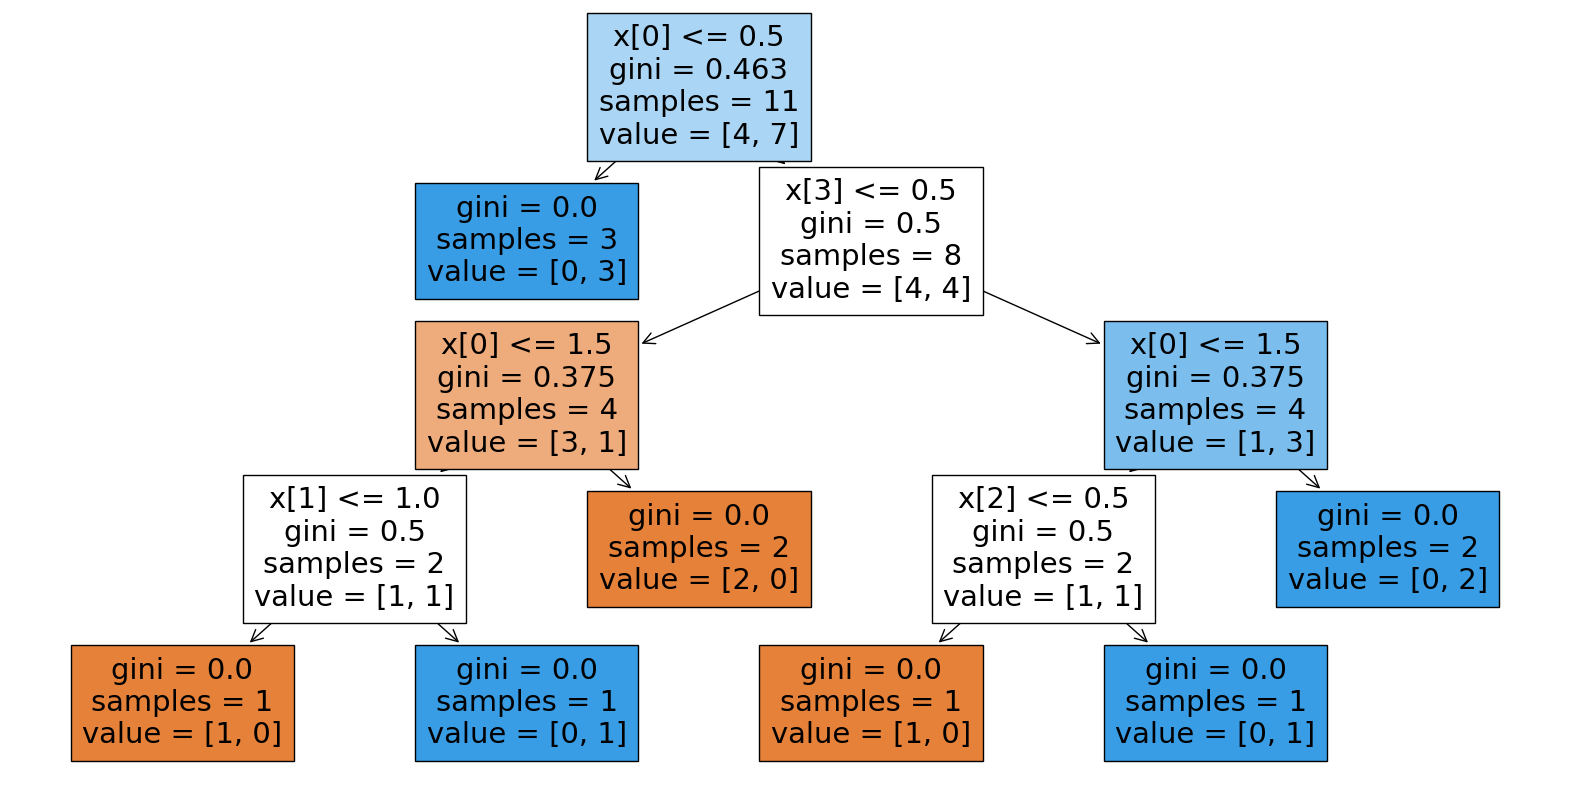

In [7]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Sample dataset (replace with your project data)
data = {
    'Age': ['<=30', '<=30', '31-40', '>40', '>40', '>40', '31-40', '<=30', '<=30', '>40', '<=30', '31-40', '31-40', '>40'],
    'Income': ['High', 'High', 'High', 'Medium', 'Low', 'Low', 'Low', 'Medium', 'Low', 'Medium', 'Medium', 'Medium', 'High', 'Medium'],
    'Student': ['No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No'],
    'Credit_Rating': ['Fair', 'Excellent', 'Fair', 'Fair', 'Fair', 'Excellent', 'Excellent', 'Fair', 'Fair', 'Fair', 'Excellent', 'Fair', 'Fair', 'Excellent'],
    'Buys_Computer': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}

df = pd.DataFrame(data)

# Convert categorical feature to numerical using Label Encoding
label_encoder = LabelEncoder()

for column in df.columns:
    df[column] = label_encoder.fit_transform(df[column])

# Separate feature (X) and target (y)
X = df.drop(columns=['Buys_Computer'])
y = df['Buys_Computer']

# Split the data into training and testing sets
Tr_X, Te_X, Tr_y, Te_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to calculate entropy
def calculate_entropy(data):
    class_labels = data.unique()
    entropy = 0
    total_instances = len(data)

    for label in class_labels:
        p = len(data[data == label]) / total_instances
        entropy -= p * np.log2(p)

    return entropy

# Function to calculate information gain
def calculate_information_gain(data, feature, target):
    entropy_before_split = calculate_entropy(target)
    total_instances = len(data)

    weighted_entropy_after_split = 0

    for value in data.unique():
        subset_indices = data[data == value].index
        subset_target = target[subset_indices]
        subset_instances = len(subset_indices)
        weighted_entropy_after_split += (subset_instances / total_instances) * calculate_entropy(subset_target)

    information_gain = entropy_before_split - weighted_entropy_after_split
    return information_gain

# Calculate entropy and information gain for each feature
feature = X.columns  # Use the column names of X as feature
information_gains = {}

for feature in feature:
    information_gains[feature] = calculate_information_gain(X[feature], feature, y)
    print(f"Information Gain for {feature}: {information_gains[feature]}")

# Find the feature with the highest information gain (the root node)
root_node = max(information_gains, key=information_gains.get)

# Find the highest information gain
highestinfo_gain = max(information_gains.values())

print(f"The first feature to select for constructing the decision tree is: {root_node}")
print(f"The highest information gain is: {highestinfo_gain}")

# Create and fit the Decision Tree model
model = DecisionTreeClassifier()
model.fit(Tr_X, Tr_y)

# Calculate the accuracy on the training set
trainaccuracy = model.score(Tr_X, Tr_y)
print(f"Training Set Accuracy: {trainaccuracy}")

# Calculate the accuracy on the test set
testaccuracy = model.score(Te_X, Te_y)
print(f"Test Set Accuracy: {testaccuracy}")

# Calculate the depth of the constructed tree
treedepth = model.get_depth()
print(f"The depth of the constructed Decision Tree is: {treedepth}")

# Visualize the constructed tree
plt.figure(figsize=(20, 10))
plot_tree(model, filled=True)
plt.show()



The shape of sample and featureis:
  (16384, 13) (16384, 1)
(16384, 13) (16384,)
The depth of the constructed Decision Tree is: 29
Training Set Accuracy: 0.6554512855725948
Test Set Accuracy: 0.4794018919743668


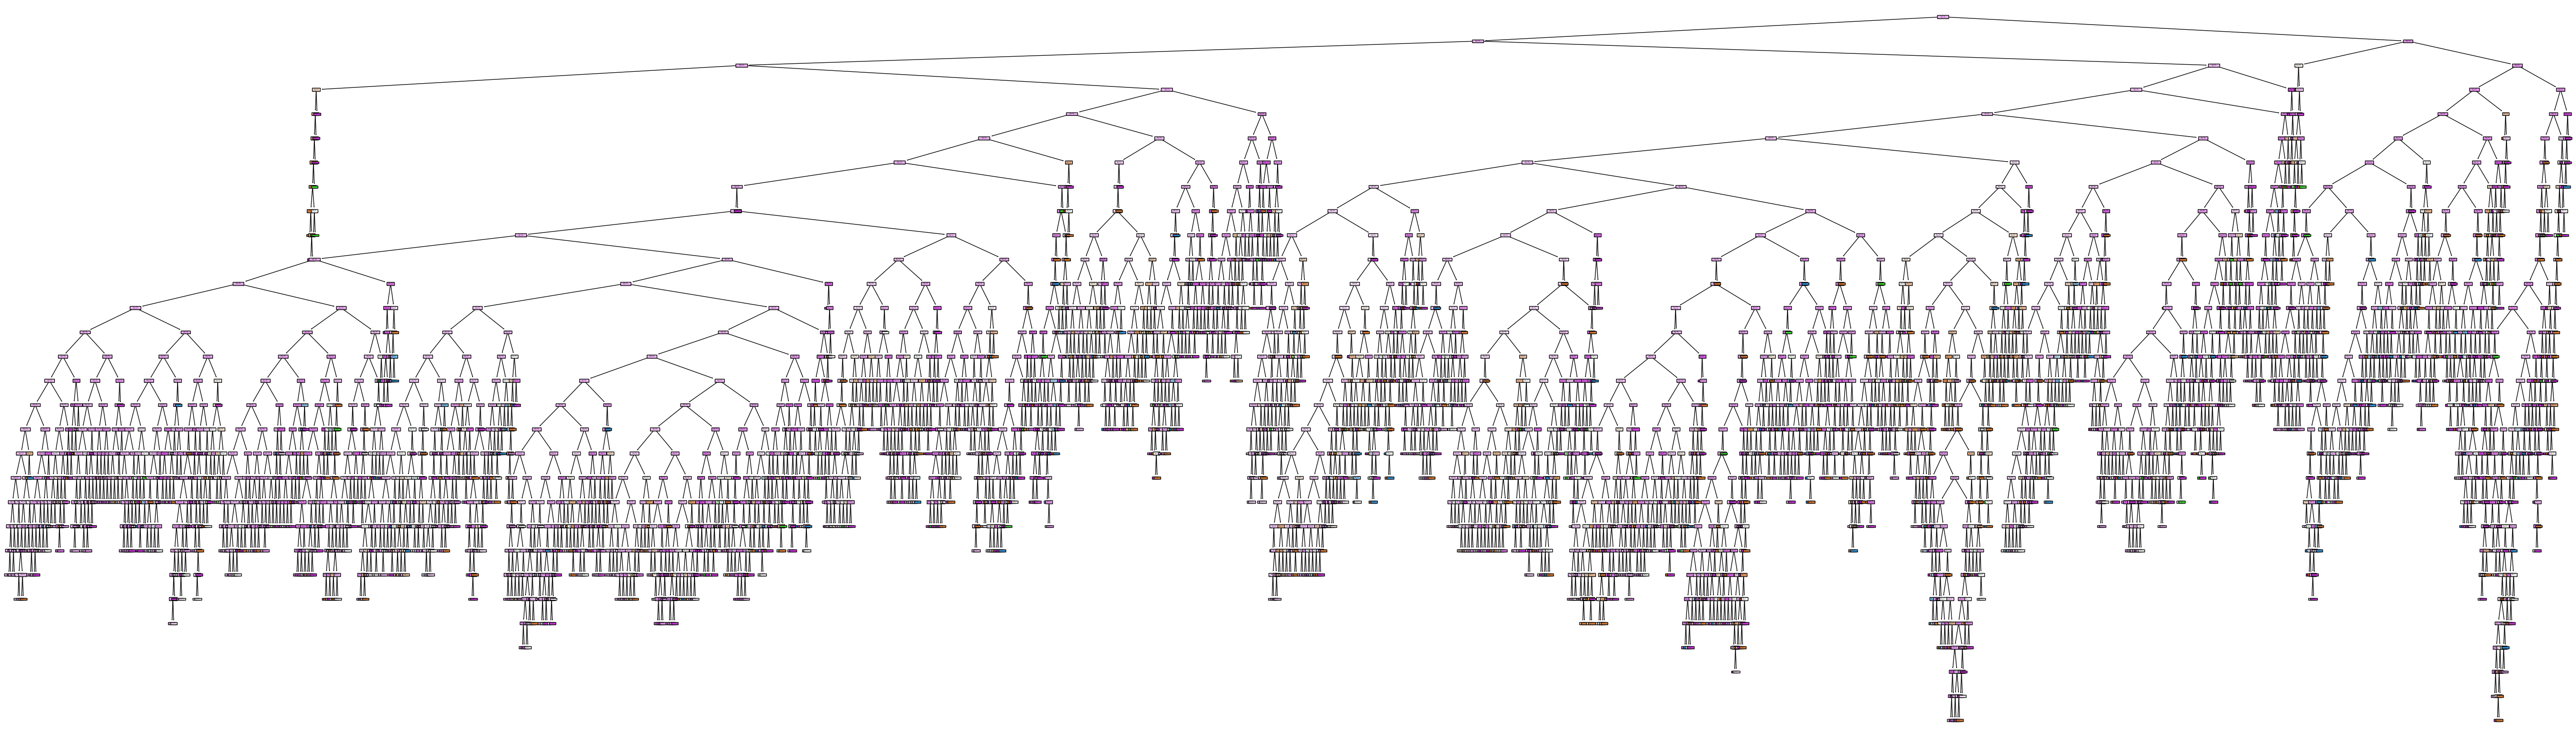

The depth of the constructed Decision Tree is: 5
Training Set Accuracy: 0.5551232166018158
Test Set Accuracy: 0.561184009765029


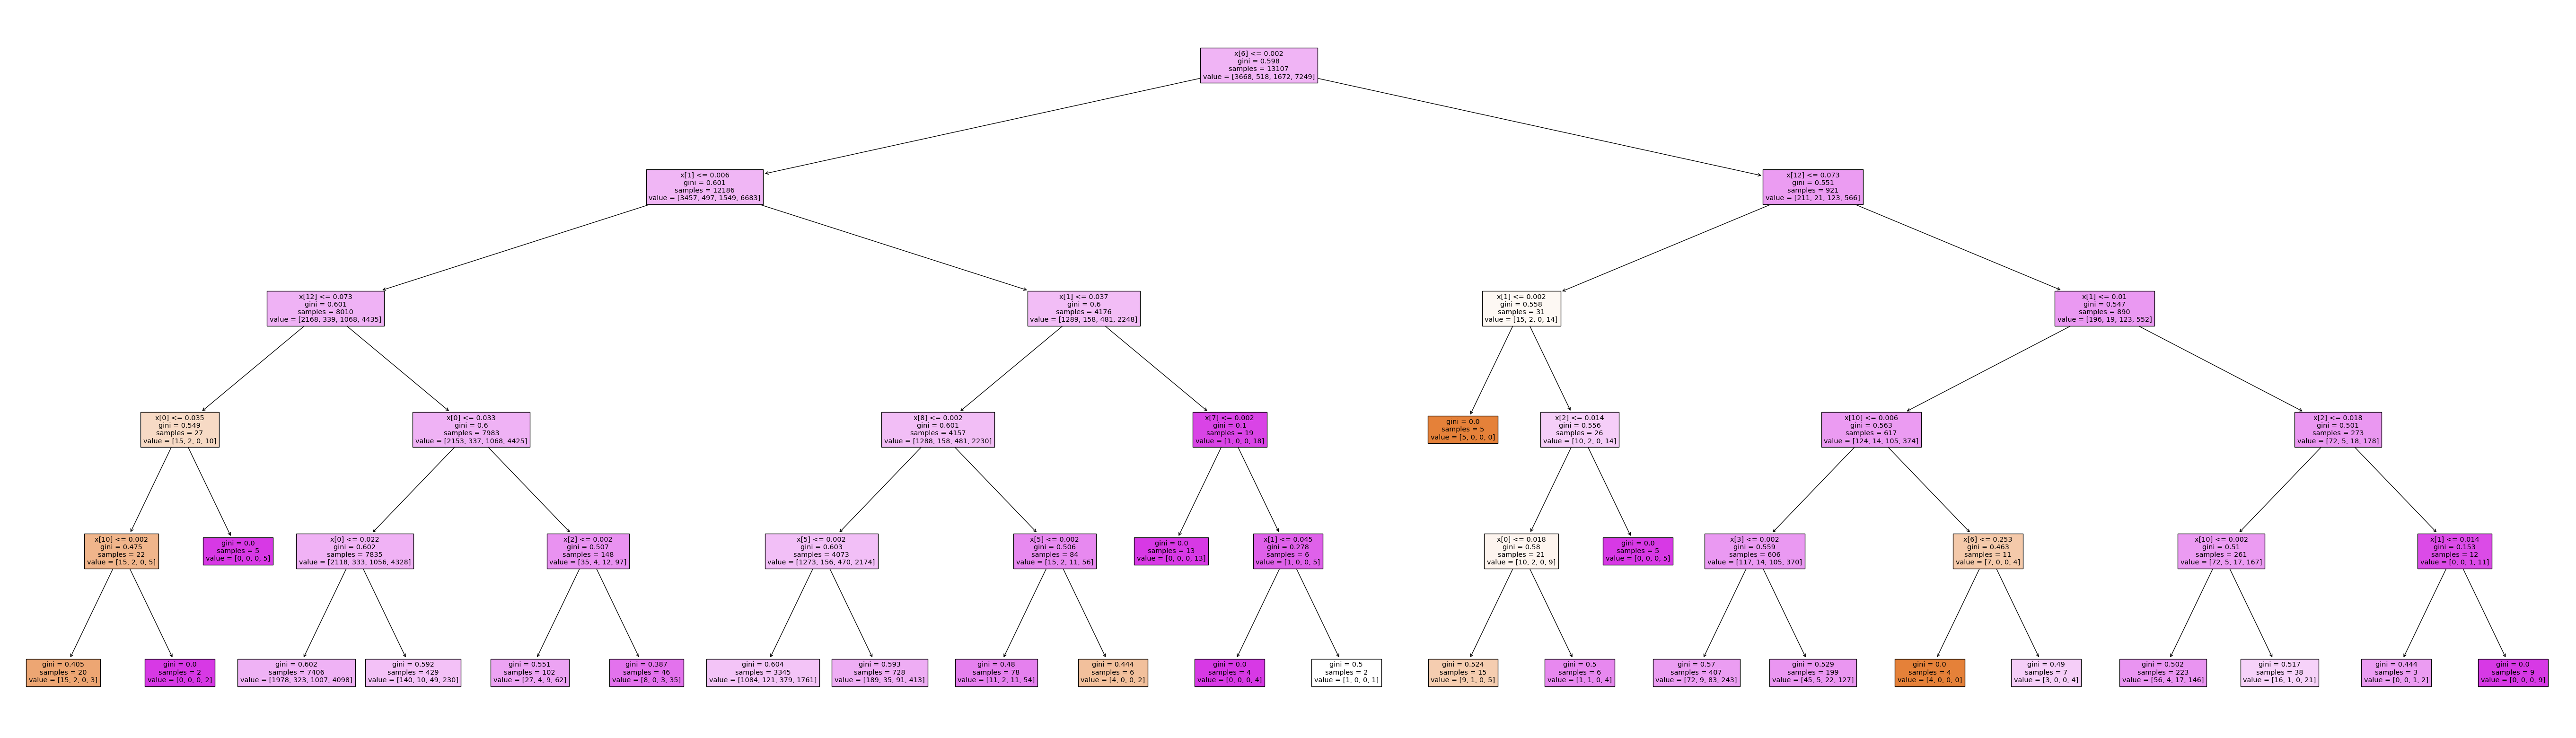

The depth of the constructed Decision Tree is: 5
Training Set Accuracy: 0.6554512855725948
Test Set Accuracy: 0.47146780592004883


In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
#Inserting feature and labels
sample = np.load('pixel.npy')
feature = np.load('labelpixel.npy')
print("The shape of sample and featureis:\n ",sample.shape,feature.shape)
# Reshaping your data in pixels x feature
samplenum = sample.shape[0]   # Total number of pixels
featurenum = sample.shape[1]  # Number of feature for each pixel
X_reshaped = sample.reshape(samplenum,featurenum)
y_reshaped = feature.reshape(samplenum)  # Assuming y is your pixel-wise label mask
print(X_reshaped.shape,y_reshaped.shape)
# Q-A4)
sample_df = pd.DataFrame(sample,columns=np.arange(0,13))
sample_df['13']=feature
# Splitting the reshaped data into training and testing set
training_data, testing_data, train_op, test_op = train_test_split(X_reshaped, y_reshaped, test_size=0.2, random_state=42)
#Q-A5)
# Creating and fiting the Decision Tree model
model = DecisionTreeClassifier()
model.fit(training_data, train_op)
# Calculating  depth of the constructed tree
treedepth = model.get_depth()
print(f"The depth of the constructed Decision Tree is: {treedepth}")
# Calculate the accuracy on the training set
trainingaccuracy = model.score(training_data, train_op)
print(f"Training Set Accuracy: {trainingaccuracy}")
# Calculate the accuracy on the test set
testaccuracy = model.score(testing_data,test_op)
print(f"Test Set Accuracy: {testaccuracy}")
# Visualizing the constructed tree
plt.figure(figsize=(70, 20))
plot_tree(model, filled=True)
plt.show()
#Q-A5)
model_maxdepth = DecisionTreeClassifier(max_depth=5)
model_maxdepth.fit(training_data, train_op)
# Calculating the depth of the constructed tree
tree_maxdepth = model_maxdepth.get_depth()
print(f"The depth of the constructed Decision Tree is: {tree_maxdepth}")
# Calculate the accuracy on the training set
trainingaccuracy_max_depth = model_maxdepth.score(training_data, train_op)
print(f"Training Set Accuracy: {trainingaccuracy_max_depth}")
# Calculate the accuracy on the test set
testaccuracy_max_depth = model_maxdepth.score(testing_data,test_op)
print(f"Test Set Accuracy: {testaccuracy_max_depth}")
# Visualizing the constructed tree
plt.figure(figsize=(70, 20))
plot_tree(model_maxdepth, filled=True)
plt.show()

#Q-A6)
model_criteria = DecisionTreeClassifier(criterion='entropy')
model_criteria.fit(training_data, train_op)

# Calculate the depth of the constructed tree
treedepth_criteria = model_criteria.get_depth()
print(f"The depth of the constructed Decision Tree is: {tree_maxdepth}")

# Calculate the accuracy on the training set
trainaccuracy_criteria = model_criteria.score(training_data, train_op)
print(f"Training Set Accuracy: {trainaccuracy_criteria}")

# Calculate the accuracy on the test set
testaccuracy_criteria = model_criteria.score(testing_data,test_op)
print(f"Test Set Accuracy: {testaccuracy_criteria}")

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
R_F_training_data = training_data
R_F_testing_data = testing_data
R_F_train_op = train_op
R_F_test_op = test_op
model_forest = RandomForestClassifier(n_estimators=50)
model_forest.fit(R_F_training_data, R_F_train_op)
output_rand_for_data_pred = model_forest.predict(R_F_testing_data)
accuracy_random_forest = metrics.accuracy_score(R_F_test_op, output_rand_for_data_pred)
print("The accuracy of the random forest is: ", accuracy_random_forest,"\n")
# Generate predictions with the best model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# Create the confusion matrix
cm = confusion_matrix(R_F_test_op, output_rand_for_data_pred)
print(cm)
print(classification_report(R_F_test_op, output_rand_for_data_pred))

The accuracy of the random forest is:  0.504424778761062 

[[ 134    4   22  776]
 [  12    0    5  109]
 [  41    0   13  322]
 [ 250    8   75 1506]]
              precision    recall  f1-score   support

           0       0.31      0.14      0.20       936
           1       0.00      0.00      0.00       126
         128       0.11      0.03      0.05       376
         255       0.56      0.82      0.66      1839

    accuracy                           0.50      3277
   macro avg       0.24      0.25      0.23      3277
weighted avg       0.41      0.50      0.43      3277

